In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab
from pylab import *
import matplotlib.dates as mdate
from numpy import genfromtxt
import fnmatch
import os
import math

%matplotlib inline

In [4]:
def process_dir(dir_name):
    # throughput
    #t_raw = genfromtxt(dir_name + '/throughput.csv', delimiter=',')
    #t_mean = np.mean(t_raw[:,1])
    #t_std = np.std(t_raw[:,1])

    #latency
    data = []
    for file in os.listdir(dir_name):
        if fnmatch.fnmatch(file, '*.qstat'):
            l_data = genfromtxt(dir_name + '/' + os.path.basename(file), delimiter=',')
            filtered = l_data[nonzero(l_data[:,2])]
            data.append(filtered[:,1].reshape((filtered[:,1].shape[0],1)))
    
    print('Processed file count: ', len(os.listdir(dir_name)))
    full_l_data = np.vstack(data)
    l_mean = np.mean(full_l_data)
    l_std = np.std(full_l_data)
    l_q25 = np.percentile(full_l_data, 25)
    l_q50 = np.percentile(full_l_data, 50)
    l_q75 = np.percentile(full_l_data, 75)
    l_q95 = np.percentile(full_l_data, 95)
    stats = (l_mean, l_std, l_q25, l_q50, l_q75, l_q95)
    #print(stats)
    return stats

In [5]:
#dirs = ('c1', 'c10', 'c100', 'c200', 'c300', 'c400', 'c500', 'c600')
#dirs = ('c1', 'c10', 'c100')
vals = []
for dir_ in dirs:
    vals.append(process_dir('../nov30015/data/' + dir_))

data = np.array(vals)
np.savetxt('summary.txt', data)
print('stored everything to disk!')

Processed file count:  5
Processed file count:  10
Processed file count:  100
stored everything to disk!


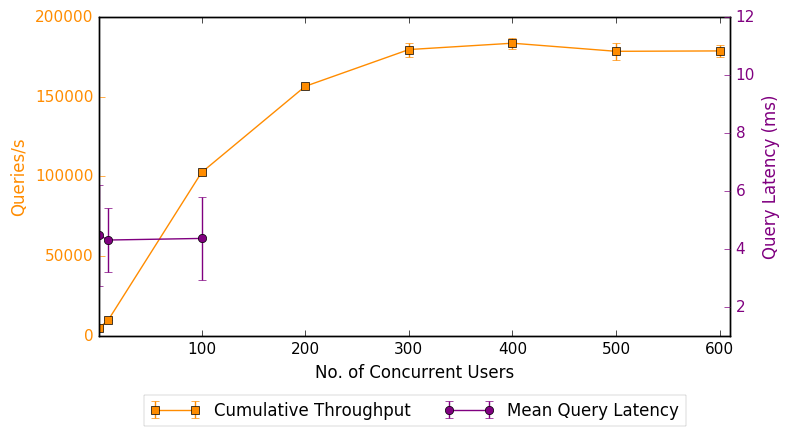

In [7]:
throughput_data = np.loadtxt('summary.txt.bk')[:,:2]

x_vals = [1, 10, 100, 200, 300, 400, 500, 600]
fig,ax = plt.subplots(figsize=(8,4))
leg_t = ax.errorbar(x_vals, throughput_data[:,0], yerr=throughput_data[:,1], color='darkorange', label='Cumulative Throughput', marker='s')
pylab.xlabel('No. of Concurrent Users', fontsize=12)
pylab.ylabel('Queries/s', fontsize=12)
ax.tick_params(axis='y', colors='darkorange')
ax.yaxis.label.set_color('darkorange')
plt.tick_params(axis='x', which='major', labelsize=11)
plt.tick_params(axis='y', which='major', labelsize=11)
plt.tick_params(axis='both', which='minor', labelsize=9)
plt.xlim(1,610)

ax2 = ax.twinx()
leg_l = ax2.errorbar(x_vals, data[:,0] + 3, yerr=data[:,1], color='purple', marker='o', label='Mean Query Latency')
plt.ylim(1, 12)
pylab.ylabel('Query Latency (ms)', fontsize=12)
ax2.tick_params(axis='y', colors='purple')
ax2.yaxis.label.set_color('purple')

plt.tick_params(axis='x', which='major', labelsize=11)
plt.tick_params(axis='y', which='major', labelsize=11)
plt.tick_params(axis='both', which='minor', labelsize=9)
plt.xlim(1,610)

lns = [leg_t, leg_l]        
labs = [l.get_label() for l in lns]
leg = ax2.legend(lns, labs, fontsize=12, ncol=2, loc='upper center', borderaxespad=0.3, handlelength=3, 
                 bbox_to_anchor=(0.5, -0.17),)
leg.get_frame().set_linewidth(0.1)
pylab.tight_layout()

fig.savefig('./figs/query_benchmark.pdf', dpi=300, bbox_extra_artists=(leg,), bbox_inches='tight')